In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../data/mos_evaluation_with_human_feedback_26116.csv")
print(len(df))
df.head()

26116


,date,audio_id,audio_path,audio_duration,sentence_id,source,doc_id,seq_id,text,prediction,...,audio_accent,audio_gender,How human or natural does the clip sound?,How noisy is the clip?,How robotic or synthetic does the clip sound?,How good is the overall quality of the clip?,How African does the speaker sound?,Check the Audio Transcript. How closely does the speaker accent match the country displayed?,How closely does the speaker voice match the accent displayed?,How closely does the speaker voice match the gender displayed?
0,2024-03-09 09:48:35.307339,9bd4d846-e2c3-459d-a6a8-12186620c4b1,https://speech-app.s3.eu-west-2.amazonaws.com/...,4.448000,01bb9e21-3d87-4074-a74e-8552e892a616,afrotts--mos_evaluation/xtts_ft,144,144,Kenya__Swahili__Female---------it felt like a ...,Kenya__Swahili__Female,...,Swahili,Female,5.0,1.0,1.0,5.0,5.0,5.0,5.0,5.0
1,2024-03-09 09:48:35.302556,2ef989cd-94f3-462c-b7c0-6d3730e80d0b,https://speech-app.s3.eu-west-2.amazonaws.com/...,8.490688,60e4d71f-ec48-46a3-af77-fd82431b169f,afrotts--mos_evaluation/xtts_ft,143,143,South Africa__Afrikaans__Female---------howeve...,South Africa__Afrikaans__Female,...,Afrikaans,Female,5.0,0.0,NaN,5.0,5.0,0.0,0.0,5.0
2,2024-03-09 09:48:35.297562,33ccdc56-d326-42e2-9b55-0c04ca6d85d3,https://speech-app.s3.eu-west-2.amazonaws.com/...,5.429375,4a89c8c7-faf2-47cb-bf93-f7d2cacf02dd,afrotts--mos_evaluation/xtts_ft,142,142,Kenya__Swahili__Female---------the population ...,Kenya__Swahili__Female,...,Swahili,Female,5.0,1.0,1.0,3.0,5.0,4.0,4.0,5.0
3,2024-03-09 09:48:35.292567,1f302ec3-73a5-498f-af39-05e820199867,https://speech-app.s3.eu-west-2.amazonaws.com/...,6.357375,76f71e5c-3282-427d-81a0-83d2a076d5a1,afrotts--mos_evaluation/xtts_ft,141,141,Kenya__Swahili__Female---------he and some of ...,Kenya__Swahili__Female,...,Swahili,Female,5.0,NaN,NaN,5.0,5.0,3.0,0.0,5.0
4,2024-03-09 09:48:35.287460,308dc33b-c0bb-45d5-b55d-05b7c1b8e872,https://speech-app.s3.eu-west-2.amazonaws.com/...,4.960000,201fc880-4a70-4657-a039-5afe8b4a4b1c,afrotts--mos_evaluation/xtts_ft,140,140,Kenya__Kikuyu__Male---------havok said dreamer...,Kenya__Kikuyu__Male,...,Kikuyu,Male,4.0,1.0,1.0,3.0,4.0,3.0,3.0,5.0


In [3]:
questions = {
    "How human or natural does the clip sound?": "Nat-MOS",
    "How robotic or synthetic does the clip sound?": "syntheticness",
    "How good is the overall quality of the clip?": "MOS",
    "How African does the speaker sound?": "Accent-MOS",
    "How closely does the speaker voice match the accent displayed?": "Accent-Match-MOS",
    "How closely does the speaker voice match the gender displayed?": "gender_match",
    "Check the Audio Transcript. How closely does the speaker accent match the country displayed?": "Country-Match-MOS",
    "How noisy is the clip?": "noisyness"
}
df = df.rename( columns=questions)

In [4]:
models={
    'afrotts--mos_evaluation/denoised_samples': 'GT denoised',
    'afrotts--mos_evaluation/vits_afrotts': 'VITS-O',
    'afrotts--mos_evaluation/vits_afrotts_ft': 'VITS-FT',
    'afrotts--mos_evaluation/vits_afrotts_ft_ext_spk': 'VITS-EXT',
    'afrotts--mos_evaluation/vits_vctk': 'VITS',
    'afrotts--mos_evaluation/xtts': 'XTTS',
    'afrotts--mos_evaluation/xtts_ft': 'XTTS-FT'
}

In [5]:
df['source'] = df['source'].map(models)

In [6]:
# df['source']

In [7]:
def print_na_columns(df):
    for c in df:
        if df[c].hasnans:
            print(f"Total nan values in `{c}`: {df[c].isna().sum()}")
print_na_columns(df)

Total nan values in `age_group`: 91
Total nan values in `discipline`: 188
Total nan values in `Nat-MOS`: 141
Total nan values in `noisyness`: 3140
Total nan values in `syntheticness`: 1165
Total nan values in `MOS`: 163
Total nan values in `Accent-MOS`: 249
Total nan values in `Country-Match-MOS`: 354
Total nan values in `Accent-Match-MOS`: 332
Total nan values in `gender_match`: 156


In [8]:
# df = df[~df["audio_duration"].isna()]
# df = df[~df["age_group"].isna()]
# print(len(df))

In [9]:
columns=list(questions.values())

In [10]:
df[columns] = df[columns].replace(0, np.nan)

In [11]:
import numpy as np
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    data = data[~np.isnan(data)]
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return f'{round(m, 2)}$\pm${round(h, 2)}'

### Table 1 -- model average

In [12]:
groupby=['source']
results = []

for m in columns:
    df_tmp = df.groupby(groupby)[m].apply(lambda d: mean_confidence_interval(d)).reset_index()
    df_tmp = df_tmp.set_index(groupby)
#     df_tmp = df_tmp.pivot(groupby, "level_1", m).rename(columns={0:'mean', 1:'CI'})
#     df_tmp = pd.concat([df_tmp], axis=1, levels=[[m]], keys=[m])
#     print(df_tmp.columns)
#     display(df_tmp)
    results.append(df_tmp)

columns_to_print=["MOS", "Nat-MOS", "Accent-MOS"]
df_tmp = pd.concat(results, axis=1)[columns_to_print]
display(df_tmp)
print(df_tmp.to_latex())

,MOS,Nat-MOS,Accent-MOS
source,,,
GT denoised,3.75$\pm$0.04,4.55$\pm$0.03,4.49$\pm$0.03
VITS,3.8$\pm$0.04,2.84$\pm$0.06,1.81$\pm$0.05
VITS-EXT,3.14$\pm$0.04,4.07$\pm$0.04,4.07$\pm$0.04
VITS-FT,3.33$\pm$0.04,4.18$\pm$0.04,4.16$\pm$0.04
VITS-O,3.02$\pm$0.05,4.0$\pm$0.04,4.02$\pm$0.04
XTTS,3.92$\pm$0.04,3.31$\pm$0.06,2.31$\pm$0.06
XTTS-FT,3.77$\pm$0.04,4.39$\pm$0.03,4.35$\pm$0.03


\begin{tabular}{llll}
\toprule
{} &            MOS &        Nat-MOS &     Accent-MOS \\
source      &                &                &                \\
\midrule
GT denoised &  3.75\$\textbackslash pm\$0.04 &  4.55\$\textbackslash pm\$0.03 &  4.49\$\textbackslash pm\$0.03 \\
VITS        &   3.8\$\textbackslash pm\$0.04 &  2.84\$\textbackslash pm\$0.06 &  1.81\$\textbackslash pm\$0.05 \\
VITS-EXT    &  3.14\$\textbackslash pm\$0.04 &  4.07\$\textbackslash pm\$0.04 &  4.07\$\textbackslash pm\$0.04 \\
VITS-FT     &  3.33\$\textbackslash pm\$0.04 &  4.18\$\textbackslash pm\$0.04 &  4.16\$\textbackslash pm\$0.04 \\
VITS-O      &  3.02\$\textbackslash pm\$0.05 &   4.0\$\textbackslash pm\$0.04 &  4.02\$\textbackslash pm\$0.04 \\
XTTS        &  3.92\$\textbackslash pm\$0.04 &  3.31\$\textbackslash pm\$0.06 &  2.31\$\textbackslash pm\$0.06 \\
XTTS-FT     &  3.77\$\textbackslash pm\$0.04 &  4.39\$\textbackslash pm\$0.03 &  4.35\$\textbackslash pm\$0.03 \\
\bottomrule
\end{tabular}



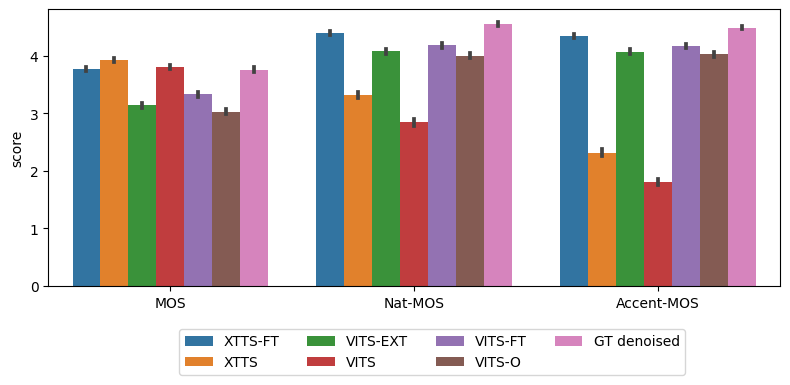

In [13]:
# Table 1: avg quality, naturalness, accentedness at the dataset level. Each row is one model. 7 rows



df_ = df.rename(columns={'overall_quality': 'MOS',
                         'naturalness': 'Nat-MOS',
                         'african_accentedness': 'Accent-MOS'})


plot_df = df_.set_index('source')[columns_to_print].stack().reset_index().rename(columns={0:'score', 'level_1': 'metric'})
plt.figure(figsize=(8,4))
sns.barplot(plot_df, y='score', x='metric', hue='source')
plt.xlabel("")
plt.legend(bbox_to_anchor=(0.88, -0.13), ncols=4)
plt.tight_layout()

plt.savefig('afrotts-mos-models.pdf', format='pdf', dpi='figure')


## Table 2 - accent-level filter average

In [14]:
# Table 2/3
def f(row):
    split1 = row["audio_accent"].split(", ")
    split2 = row["accent"].split(", ")
    split2 = [i.lower() for i in split2]
    
    for i in split1:
        if i.lower() in split2:
            return True
    else:
        return False
df_filter = df[df.apply(lambda x: f(x), axis=1)]
df_filter[["accent", "audio_accent"]]

,accent,audio_accent
13,Zulu,Zulu
35,"Kamba, Swahili",Swahili
44,Zulu,Zulu
55,Zulu,Zulu
64,Zulu,Zulu
...,...,...
26103,Yoruba,Yoruba
26106,Yoruba,Yoruba
26107,Hausa,Hausa
26109,Yoruba,Yoruba


In [15]:
for s in df_filter['source'].unique():
    print(s)
    df_ = df_filter.query(f"source == '{s}'")
    groupby=['audio_country']
    results = []

    for m in columns:
        df_tmp = df_.groupby(groupby)[m].apply(lambda d: mean_confidence_interval(d)).reset_index()
        df_tmp = df_tmp.set_index(groupby)
    #     df_tmp = df_tmp.pivot(groupby, "level_1", m).rename(columns={0:'mean', 1:'CI'})
    #     df_tmp = pd.concat([df_tmp], axis=1, levels=[[m]], keys=[m])
    #     print(df_tmp.columns)
    #     display(df_tmp)
        results.append(df_tmp)

    columns_to_print=["Country-Match-MOS", "Accent-Match-MOS"]
    df_tmp = pd.concat(results, axis=1)[columns_to_print]
    display(df_tmp)
    print(df_tmp.to_latex())

XTTS-FT


,Country-Match-MOS,Accent-Match-MOS
audio_country,,
Ghana,4.0$\pm$nan,4.0$\pm$nan
Kenya,3.93$\pm$0.52,3.9$\pm$0.48
Nigeria,4.24$\pm$0.11,3.54$\pm$0.15
South Africa,3.4$\pm$0.49,2.93$\pm$0.53


\begin{tabular}{lll}
\toprule
{} & Country-Match-MOS & Accent-Match-MOS \\
audio\_country &                   &                  \\
\midrule
Ghana         &       4.0\$\textbackslash pm\$nan &      4.0\$\textbackslash pm\$nan \\
Kenya         &     3.93\$\textbackslash pm\$0.52 &     3.9\$\textbackslash pm\$0.48 \\
Nigeria       &     4.24\$\textbackslash pm\$0.11 &    3.54\$\textbackslash pm\$0.15 \\
South Africa  &      3.4\$\textbackslash pm\$0.49 &    2.93\$\textbackslash pm\$0.53 \\
\bottomrule
\end{tabular}

XTTS


,Country-Match-MOS,Accent-Match-MOS
audio_country,,
Kenya,2.86$\pm$0.71,2.68$\pm$0.8
Nigeria,2.56$\pm$0.2,2.16$\pm$0.18
South Africa,2.72$\pm$0.6,2.33$\pm$0.58


\begin{tabular}{lll}
\toprule
{} & Country-Match-MOS & Accent-Match-MOS \\
audio\_country &                   &                  \\
\midrule
Kenya         &     2.86\$\textbackslash pm\$0.71 &     2.68\$\textbackslash pm\$0.8 \\
Nigeria       &      2.56\$\textbackslash pm\$0.2 &    2.16\$\textbackslash pm\$0.18 \\
South Africa  &      2.72\$\textbackslash pm\$0.6 &    2.33\$\textbackslash pm\$0.58 \\
\bottomrule
\end{tabular}

VITS-EXT


,Country-Match-MOS,Accent-Match-MOS
audio_country,,
Kenya,3.79$\pm$0.58,3.29$\pm$0.59
Nigeria,3.72$\pm$0.15,2.8$\pm$0.17
South Africa,2.87$\pm$0.61,2.66$\pm$0.58


\begin{tabular}{lll}
\toprule
{} & Country-Match-MOS & Accent-Match-MOS \\
audio\_country &                   &                  \\
\midrule
Kenya         &     3.79\$\textbackslash pm\$0.58 &    3.29\$\textbackslash pm\$0.59 \\
Nigeria       &     3.72\$\textbackslash pm\$0.15 &     2.8\$\textbackslash pm\$0.17 \\
South Africa  &     2.87\$\textbackslash pm\$0.61 &    2.66\$\textbackslash pm\$0.58 \\
\bottomrule
\end{tabular}

VITS


,Country-Match-MOS,Accent-Match-MOS
audio_country,,
Kenya,2.04$\pm$0.71,2.14$\pm$0.69
Nigeria,2.3$\pm$0.21,1.84$\pm$0.18
South Africa,2.35$\pm$0.52,2.26$\pm$0.49


\begin{tabular}{lll}
\toprule
{} & Country-Match-MOS & Accent-Match-MOS \\
audio\_country &                   &                  \\
\midrule
Kenya         &     2.04\$\textbackslash pm\$0.71 &    2.14\$\textbackslash pm\$0.69 \\
Nigeria       &      2.3\$\textbackslash pm\$0.21 &    1.84\$\textbackslash pm\$0.18 \\
South Africa  &     2.35\$\textbackslash pm\$0.52 &    2.26\$\textbackslash pm\$0.49 \\
\bottomrule
\end{tabular}

VITS-FT


,Country-Match-MOS,Accent-Match-MOS
audio_country,,
Kenya,3.71$\pm$0.6,3.61$\pm$0.63
Nigeria,3.91$\pm$0.14,3.21$\pm$0.16
South Africa,3.38$\pm$0.66,2.73$\pm$0.62


\begin{tabular}{lll}
\toprule
{} & Country-Match-MOS & Accent-Match-MOS \\
audio\_country &                   &                  \\
\midrule
Kenya         &      3.71\$\textbackslash pm\$0.6 &    3.61\$\textbackslash pm\$0.63 \\
Nigeria       &     3.91\$\textbackslash pm\$0.14 &    3.21\$\textbackslash pm\$0.16 \\
South Africa  &     3.38\$\textbackslash pm\$0.66 &    2.73\$\textbackslash pm\$0.62 \\
\bottomrule
\end{tabular}

VITS-O


,Country-Match-MOS,Accent-Match-MOS
audio_country,,
Ghana,1.5$\pm$6.35,1.5$\pm$6.35
Kenya,4.0$\pm$0.6,3.78$\pm$0.65
Nigeria,3.69$\pm$0.14,2.85$\pm$0.17
South Africa,2.86$\pm$0.62,2.41$\pm$0.54


\begin{tabular}{lll}
\toprule
{} & Country-Match-MOS & Accent-Match-MOS \\
audio\_country &                   &                  \\
\midrule
Ghana         &      1.5\$\textbackslash pm\$6.35 &     1.5\$\textbackslash pm\$6.35 \\
Kenya         &       4.0\$\textbackslash pm\$0.6 &    3.78\$\textbackslash pm\$0.65 \\
Nigeria       &     3.69\$\textbackslash pm\$0.14 &    2.85\$\textbackslash pm\$0.17 \\
South Africa  &     2.86\$\textbackslash pm\$0.62 &    2.41\$\textbackslash pm\$0.54 \\
\bottomrule
\end{tabular}

GT denoised


,Country-Match-MOS,Accent-Match-MOS
audio_country,,
Ghana,5.0$\pm$nan,5.0$\pm$nan
Kenya,4.86$\pm$0.17,4.53$\pm$0.4
Nigeria,4.6$\pm$0.08,4.23$\pm$0.11
South Africa,4.38$\pm$0.3,4.2$\pm$0.38


\begin{tabular}{lll}
\toprule
{} & Country-Match-MOS & Accent-Match-MOS \\
audio\_country &                   &                  \\
\midrule
Ghana         &       5.0\$\textbackslash pm\$nan &      5.0\$\textbackslash pm\$nan \\
Kenya         &     4.86\$\textbackslash pm\$0.17 &     4.53\$\textbackslash pm\$0.4 \\
Nigeria       &      4.6\$\textbackslash pm\$0.08 &    4.23\$\textbackslash pm\$0.11 \\
South Africa  &      4.38\$\textbackslash pm\$0.3 &     4.2\$\textbackslash pm\$0.38 \\
\bottomrule
\end{tabular}



In [16]:
for s in df_filter['source'].unique():
    print(s)
    df_ = df_filter.query(f"source == '{s}'")
    groupby=['audio_accent']
    results = []

    for m in columns:
        df_tmp = df_.groupby(groupby)[m].apply(lambda d: mean_confidence_interval(d)).reset_index()
        df_tmp = df_tmp.set_index(groupby)
        results.append(df_tmp)

    df_tmp = pd.concat(results, axis=1)[columns_to_print]
    display(df_tmp)
    print(df_tmp.to_latex())

XTTS-FT


,Country-Match-MOS,Accent-Match-MOS
audio_accent,,
Afrikaans,4.8$\pm$0.56,2.67$\pm$5.17
Akan,4.0$\pm$nan,4.0$\pm$nan
Hausa,4.23$\pm$0.22,3.93$\pm$0.25
"Hausa, Higgi, Pidgin",4.33$\pm$1.43,4.0$\pm$4.3
"Hausa, Yoruba, Pidgin",4.76$\pm$0.4,4.5$\pm$0.39
Ibibio,4.0$\pm$nan,2.0$\pm$nan
Idoma,4.0$\pm$12.71,3.0$\pm$0.0
Igbo,4.12$\pm$1.37,2.25$\pm$1.24
Ijaw,3.33$\pm$1.09,2.78$\pm$1.2


\begin{tabular}{lll}
\toprule
{} & Country-Match-MOS & Accent-Match-MOS \\
audio\_accent          &                   &                  \\
\midrule
Afrikaans             &      4.8\$\textbackslash pm\$0.56 &    2.67\$\textbackslash pm\$5.17 \\
Akan                  &       4.0\$\textbackslash pm\$nan &      4.0\$\textbackslash pm\$nan \\
Hausa                 &     4.23\$\textbackslash pm\$0.22 &    3.93\$\textbackslash pm\$0.25 \\
Hausa, Higgi, Pidgin  &     4.33\$\textbackslash pm\$1.43 &      4.0\$\textbackslash pm\$4.3 \\
Hausa, Yoruba, Pidgin &      4.76\$\textbackslash pm\$0.4 &     4.5\$\textbackslash pm\$0.39 \\
Ibibio                &       4.0\$\textbackslash pm\$nan &      2.0\$\textbackslash pm\$nan \\
Idoma                 &     4.0\$\textbackslash pm\$12.71 &      3.0\$\textbackslash pm\$0.0 \\
Igbo                  &     4.12\$\textbackslash pm\$1.37 &    2.25\$\textbackslash pm\$1.24 \\
Ijaw                  &     3.33\$\textbackslash pm\$1.09 &     2.78\$\textbackslas

,Country-Match-MOS,Accent-Match-MOS
audio_accent,,
Afrikaans,4.5$\pm$6.35,4.5$\pm$6.35
Hausa,3.3$\pm$0.4,2.85$\pm$0.38
"Hausa, Higgi, Pidgin",3.29$\pm$1.75,2.2$\pm$1.62
"Hausa, Yoruba, Pidgin",2.36$\pm$1.17,1.78$\pm$1.0
Idoma,1.0$\pm$nan,nan$\pm$nan
Igbo,2.45$\pm$1.22,2.45$\pm$1.06
Ijaw,1.22$\pm$0.51,1.0$\pm$0.0
"Kamba, Swahili",nan$\pm$nan,nan$\pm$nan
Swahili,2.95$\pm$0.7,2.76$\pm$0.8


\begin{tabular}{lll}
\toprule
{} & Country-Match-MOS & Accent-Match-MOS \\
audio\_accent          &                   &                  \\
\midrule
Afrikaans             &      4.5\$\textbackslash pm\$6.35 &     4.5\$\textbackslash pm\$6.35 \\
Hausa                 &       3.3\$\textbackslash pm\$0.4 &    2.85\$\textbackslash pm\$0.38 \\
Hausa, Higgi, Pidgin  &     3.29\$\textbackslash pm\$1.75 &     2.2\$\textbackslash pm\$1.62 \\
Hausa, Yoruba, Pidgin &     2.36\$\textbackslash pm\$1.17 &     1.78\$\textbackslash pm\$1.0 \\
Idoma                 &       1.0\$\textbackslash pm\$nan &      nan\$\textbackslash pm\$nan \\
Igbo                  &     2.45\$\textbackslash pm\$1.22 &    2.45\$\textbackslash pm\$1.06 \\
Ijaw                  &     1.22\$\textbackslash pm\$0.51 &      1.0\$\textbackslash pm\$0.0 \\
Kamba, Swahili        &       nan\$\textbackslash pm\$nan &      nan\$\textbackslash pm\$nan \\
Swahili               &      2.95\$\textbackslash pm\$0.7 &     2.76\$\textbackslas

,Country-Match-MOS,Accent-Match-MOS
audio_accent,,
Afrikaans,3.0$\pm$2.48,3.0$\pm$2.48
Hausa,3.68$\pm$0.29,3.09$\pm$0.32
"Hausa, Higgi, Pidgin",4.29$\pm$1.38,3.29$\pm$1.48
"Hausa, Yoruba, Pidgin",4.16$\pm$0.54,3.68$\pm$0.53
Ibibio,1.0$\pm$nan,1.0$\pm$nan
Idoma,5.0$\pm$nan,5.0$\pm$nan
Igala,3.0$\pm$25.41,3.0$\pm$25.41
Igbo,3.13$\pm$0.88,2.75$\pm$1.05
Ijaw,3.33$\pm$1.27,2.33$\pm$1.27


\begin{tabular}{lll}
\toprule
{} & Country-Match-MOS & Accent-Match-MOS \\
audio\_accent          &                   &                  \\
\midrule
Afrikaans             &      3.0\$\textbackslash pm\$2.48 &     3.0\$\textbackslash pm\$2.48 \\
Hausa                 &     3.68\$\textbackslash pm\$0.29 &    3.09\$\textbackslash pm\$0.32 \\
Hausa, Higgi, Pidgin  &     4.29\$\textbackslash pm\$1.38 &    3.29\$\textbackslash pm\$1.48 \\
Hausa, Yoruba, Pidgin &     4.16\$\textbackslash pm\$0.54 &    3.68\$\textbackslash pm\$0.53 \\
Ibibio                &       1.0\$\textbackslash pm\$nan &      1.0\$\textbackslash pm\$nan \\
Idoma                 &       5.0\$\textbackslash pm\$nan &      5.0\$\textbackslash pm\$nan \\
Igala                 &     3.0\$\textbackslash pm\$25.41 &    3.0\$\textbackslash pm\$25.41 \\
Igbo                  &     3.13\$\textbackslash pm\$0.88 &    2.75\$\textbackslash pm\$1.05 \\
Ijaw                  &     3.33\$\textbackslash pm\$1.27 &    2.33\$\textbackslash

,Country-Match-MOS,Accent-Match-MOS
audio_accent,,
Afrikaans,4.0$\pm$2.48,3.67$\pm$3.79
Hausa,3.12$\pm$0.39,2.18$\pm$0.35
"Hausa, Higgi, Pidgin",2.33$\pm$5.74,2.0$\pm$1.76
"Hausa, Yoruba, Pidgin",2.67$\pm$1.04,2.07$\pm$0.87
Ibibio,1.0$\pm$nan,1.0$\pm$nan
Igala,1.0$\pm$nan,1.0$\pm$nan
Igbo,1.5$\pm$0.57,1.14$\pm$0.35
Ijaw,1.0$\pm$0.0,1.0$\pm$0.0
"Kamba, Swahili",nan$\pm$nan,nan$\pm$nan


\begin{tabular}{lll}
\toprule
{} & Country-Match-MOS & Accent-Match-MOS \\
audio\_accent          &                   &                  \\
\midrule
Afrikaans             &      4.0\$\textbackslash pm\$2.48 &    3.67\$\textbackslash pm\$3.79 \\
Hausa                 &     3.12\$\textbackslash pm\$0.39 &    2.18\$\textbackslash pm\$0.35 \\
Hausa, Higgi, Pidgin  &     2.33\$\textbackslash pm\$5.74 &     2.0\$\textbackslash pm\$1.76 \\
Hausa, Yoruba, Pidgin &     2.67\$\textbackslash pm\$1.04 &    2.07\$\textbackslash pm\$0.87 \\
Ibibio                &       1.0\$\textbackslash pm\$nan &      1.0\$\textbackslash pm\$nan \\
Igala                 &       1.0\$\textbackslash pm\$nan &      1.0\$\textbackslash pm\$nan \\
Igbo                  &      1.5\$\textbackslash pm\$0.57 &    1.14\$\textbackslash pm\$0.35 \\
Ijaw                  &       1.0\$\textbackslash pm\$0.0 &      1.0\$\textbackslash pm\$0.0 \\
Kamba, Swahili        &       nan\$\textbackslash pm\$nan &      nan\$\textbackslas

,Country-Match-MOS,Accent-Match-MOS
audio_accent,,
Afrikaans,3.0$\pm$25.41,1.0$\pm$0.0
Hausa,3.92$\pm$0.27,3.57$\pm$0.29
"Hausa, Higgi, Pidgin",2.75$\pm$3.28,2.33$\pm$5.74
"Hausa, Yoruba, Pidgin",3.94$\pm$0.67,3.47$\pm$0.75
Igbo,3.0$\pm$1.0,2.64$\pm$0.91
Ijaw,3.17$\pm$1.81,2.67$\pm$1.58
"Kamba, Swahili",4.5$\pm$6.35,4.5$\pm$6.35
Shona,nan$\pm$nan,nan$\pm$nan
Swahili,3.45$\pm$0.81,3.35$\pm$0.79


\begin{tabular}{lll}
\toprule
{} & Country-Match-MOS & Accent-Match-MOS \\
audio\_accent          &                   &                  \\
\midrule
Afrikaans             &     3.0\$\textbackslash pm\$25.41 &      1.0\$\textbackslash pm\$0.0 \\
Hausa                 &     3.92\$\textbackslash pm\$0.27 &    3.57\$\textbackslash pm\$0.29 \\
Hausa, Higgi, Pidgin  &     2.75\$\textbackslash pm\$3.28 &    2.33\$\textbackslash pm\$5.74 \\
Hausa, Yoruba, Pidgin &     3.94\$\textbackslash pm\$0.67 &    3.47\$\textbackslash pm\$0.75 \\
Igbo                  &       3.0\$\textbackslash pm\$1.0 &    2.64\$\textbackslash pm\$0.91 \\
Ijaw                  &     3.17\$\textbackslash pm\$1.81 &    2.67\$\textbackslash pm\$1.58 \\
Kamba, Swahili        &      4.5\$\textbackslash pm\$6.35 &     4.5\$\textbackslash pm\$6.35 \\
Shona                 &       nan\$\textbackslash pm\$nan &      nan\$\textbackslash pm\$nan \\
Swahili               &     3.45\$\textbackslash pm\$0.81 &    3.35\$\textbackslash

,Country-Match-MOS,Accent-Match-MOS
audio_accent,,
Afrikaans,5.0$\pm$nan,1.0$\pm$nan
Akan,1.5$\pm$6.35,1.5$\pm$6.35
Hausa,3.69$\pm$0.28,3.34$\pm$0.29
"Hausa, Higgi, Pidgin",1.5$\pm$6.35,1.0$\pm$0.0
"Hausa, Yoruba, Pidgin",4.28$\pm$0.51,3.81$\pm$0.78
Ibibio,3.0$\pm$nan,1.0$\pm$nan
Idoma,1.0$\pm$nan,nan$\pm$nan
Igbo,3.14$\pm$1.35,3.0$\pm$1.99
Ijaw,4.2$\pm$2.22,1.8$\pm$2.22


\begin{tabular}{lll}
\toprule
{} & Country-Match-MOS & Accent-Match-MOS \\
audio\_accent          &                   &                  \\
\midrule
Afrikaans             &       5.0\$\textbackslash pm\$nan &      1.0\$\textbackslash pm\$nan \\
Akan                  &      1.5\$\textbackslash pm\$6.35 &     1.5\$\textbackslash pm\$6.35 \\
Hausa                 &     3.69\$\textbackslash pm\$0.28 &    3.34\$\textbackslash pm\$0.29 \\
Hausa, Higgi, Pidgin  &      1.5\$\textbackslash pm\$6.35 &      1.0\$\textbackslash pm\$0.0 \\
Hausa, Yoruba, Pidgin &     4.28\$\textbackslash pm\$0.51 &    3.81\$\textbackslash pm\$0.78 \\
Ibibio                &       3.0\$\textbackslash pm\$nan &      1.0\$\textbackslash pm\$nan \\
Idoma                 &       1.0\$\textbackslash pm\$nan &      nan\$\textbackslash pm\$nan \\
Igbo                  &     3.14\$\textbackslash pm\$1.35 &     3.0\$\textbackslash pm\$1.99 \\
Ijaw                  &      4.2\$\textbackslash pm\$2.22 &     1.8\$\textbackslash

,Country-Match-MOS,Accent-Match-MOS
audio_accent,,
Afrikaans,4.5$\pm$1.59,2.67$\pm$5.17
Akan,5.0$\pm$nan,5.0$\pm$nan
Hausa,4.77$\pm$0.09,4.56$\pm$0.17
"Hausa, Higgi, Pidgin",4.67$\pm$1.43,3.33$\pm$2.87
"Hausa, Yoruba, Pidgin",4.59$\pm$0.43,4.04$\pm$0.55
Ibibio,5.0$\pm$nan,1.0$\pm$nan
Idoma,4.5$\pm$0.92,3.75$\pm$1.52
Igbo,4.13$\pm$0.59,4.07$\pm$0.64
Ijaw,4.78$\pm$0.34,2.89$\pm$1.36


\begin{tabular}{lll}
\toprule
{} & Country-Match-MOS & Accent-Match-MOS \\
audio\_accent          &                   &                  \\
\midrule
Afrikaans             &      4.5\$\textbackslash pm\$1.59 &    2.67\$\textbackslash pm\$5.17 \\
Akan                  &       5.0\$\textbackslash pm\$nan &      5.0\$\textbackslash pm\$nan \\
Hausa                 &     4.77\$\textbackslash pm\$0.09 &    4.56\$\textbackslash pm\$0.17 \\
Hausa, Higgi, Pidgin  &     4.67\$\textbackslash pm\$1.43 &    3.33\$\textbackslash pm\$2.87 \\
Hausa, Yoruba, Pidgin &     4.59\$\textbackslash pm\$0.43 &    4.04\$\textbackslash pm\$0.55 \\
Ibibio                &       5.0\$\textbackslash pm\$nan &      1.0\$\textbackslash pm\$nan \\
Idoma                 &      4.5\$\textbackslash pm\$0.92 &    3.75\$\textbackslash pm\$1.52 \\
Igbo                  &     4.13\$\textbackslash pm\$0.59 &    4.07\$\textbackslash pm\$0.64 \\
Ijaw                  &     4.78\$\textbackslash pm\$0.34 &    2.89\$\textbackslash

In [17]:
for s in df_filter['source'].unique():
    print(s)
    df_ = df_filter.query(f"source == '{s}'")
    groupby=['audio_accent']
    results = []

    for m in columns:
        df_tmp = df_.groupby(groupby)[m].apply(lambda d: len(d)).reset_index()
        df_tmp = df_tmp.set_index(groupby)
        display(df_tmp)

XTTS-FT


,Nat-MOS
audio_accent,
Afrikaans,5
Akan,1
Hausa,134
"Hausa, Higgi, Pidgin",4
"Hausa, Yoruba, Pidgin",23
Ibibio,1
Idoma,2
Igbo,8
Ijaw,9


,syntheticness
audio_accent,
Afrikaans,5
Akan,1
Hausa,134
"Hausa, Higgi, Pidgin",4
"Hausa, Yoruba, Pidgin",23
Ibibio,1
Idoma,2
Igbo,8
Ijaw,9


,MOS
audio_accent,
Afrikaans,5
Akan,1
Hausa,134
"Hausa, Higgi, Pidgin",4
"Hausa, Yoruba, Pidgin",23
Ibibio,1
Idoma,2
Igbo,8
Ijaw,9


,Accent-MOS
audio_accent,
Afrikaans,5
Akan,1
Hausa,134
"Hausa, Higgi, Pidgin",4
"Hausa, Yoruba, Pidgin",23
Ibibio,1
Idoma,2
Igbo,8
Ijaw,9


,Accent-Match-MOS
audio_accent,
Afrikaans,5
Akan,1
Hausa,134
"Hausa, Higgi, Pidgin",4
"Hausa, Yoruba, Pidgin",23
Ibibio,1
Idoma,2
Igbo,8
Ijaw,9


,gender_match
audio_accent,
Afrikaans,5
Akan,1
Hausa,134
"Hausa, Higgi, Pidgin",4
"Hausa, Yoruba, Pidgin",23
Ibibio,1
Idoma,2
Igbo,8
Ijaw,9


,Country-Match-MOS
audio_accent,
Afrikaans,5
Akan,1
Hausa,134
"Hausa, Higgi, Pidgin",4
"Hausa, Yoruba, Pidgin",23
Ibibio,1
Idoma,2
Igbo,8
Ijaw,9


,noisyness
audio_accent,
Afrikaans,5
Akan,1
Hausa,134
"Hausa, Higgi, Pidgin",4
"Hausa, Yoruba, Pidgin",23
Ibibio,1
Idoma,2
Igbo,8
Ijaw,9


XTTS


,Nat-MOS
audio_accent,
Afrikaans,4
Hausa,123
"Hausa, Higgi, Pidgin",7
"Hausa, Yoruba, Pidgin",16
Idoma,2
Igbo,12
Ijaw,10
"Kamba, Swahili",3
Swahili,28


,syntheticness
audio_accent,
Afrikaans,4
Hausa,123
"Hausa, Higgi, Pidgin",7
"Hausa, Yoruba, Pidgin",16
Idoma,2
Igbo,12
Ijaw,10
"Kamba, Swahili",3
Swahili,28


,MOS
audio_accent,
Afrikaans,4
Hausa,123
"Hausa, Higgi, Pidgin",7
"Hausa, Yoruba, Pidgin",16
Idoma,2
Igbo,12
Ijaw,10
"Kamba, Swahili",3
Swahili,28


,Accent-MOS
audio_accent,
Afrikaans,4
Hausa,123
"Hausa, Higgi, Pidgin",7
"Hausa, Yoruba, Pidgin",16
Idoma,2
Igbo,12
Ijaw,10
"Kamba, Swahili",3
Swahili,28


,Accent-Match-MOS
audio_accent,
Afrikaans,4
Hausa,123
"Hausa, Higgi, Pidgin",7
"Hausa, Yoruba, Pidgin",16
Idoma,2
Igbo,12
Ijaw,10
"Kamba, Swahili",3
Swahili,28


,gender_match
audio_accent,
Afrikaans,4
Hausa,123
"Hausa, Higgi, Pidgin",7
"Hausa, Yoruba, Pidgin",16
Idoma,2
Igbo,12
Ijaw,10
"Kamba, Swahili",3
Swahili,28


,Country-Match-MOS
audio_accent,
Afrikaans,4
Hausa,123
"Hausa, Higgi, Pidgin",7
"Hausa, Yoruba, Pidgin",16
Idoma,2
Igbo,12
Ijaw,10
"Kamba, Swahili",3
Swahili,28


,noisyness
audio_accent,
Afrikaans,4
Hausa,123
"Hausa, Higgi, Pidgin",7
"Hausa, Yoruba, Pidgin",16
Idoma,2
Igbo,12
Ijaw,10
"Kamba, Swahili",3
Swahili,28


VITS-EXT


,Nat-MOS
audio_accent,
Afrikaans,3
Hausa,126
"Hausa, Higgi, Pidgin",8
"Hausa, Yoruba, Pidgin",20
Ibibio,2
Idoma,2
Igala,2
Igbo,15
Ijaw,6


,syntheticness
audio_accent,
Afrikaans,3
Hausa,126
"Hausa, Higgi, Pidgin",8
"Hausa, Yoruba, Pidgin",20
Ibibio,2
Idoma,2
Igala,2
Igbo,15
Ijaw,6


,MOS
audio_accent,
Afrikaans,3
Hausa,126
"Hausa, Higgi, Pidgin",8
"Hausa, Yoruba, Pidgin",20
Ibibio,2
Idoma,2
Igala,2
Igbo,15
Ijaw,6


,Accent-MOS
audio_accent,
Afrikaans,3
Hausa,126
"Hausa, Higgi, Pidgin",8
"Hausa, Yoruba, Pidgin",20
Ibibio,2
Idoma,2
Igala,2
Igbo,15
Ijaw,6


,Accent-Match-MOS
audio_accent,
Afrikaans,3
Hausa,126
"Hausa, Higgi, Pidgin",8
"Hausa, Yoruba, Pidgin",20
Ibibio,2
Idoma,2
Igala,2
Igbo,15
Ijaw,6


,gender_match
audio_accent,
Afrikaans,3
Hausa,126
"Hausa, Higgi, Pidgin",8
"Hausa, Yoruba, Pidgin",20
Ibibio,2
Idoma,2
Igala,2
Igbo,15
Ijaw,6


,Country-Match-MOS
audio_accent,
Afrikaans,3
Hausa,126
"Hausa, Higgi, Pidgin",8
"Hausa, Yoruba, Pidgin",20
Ibibio,2
Idoma,2
Igala,2
Igbo,15
Ijaw,6


,noisyness
audio_accent,
Afrikaans,3
Hausa,126
"Hausa, Higgi, Pidgin",8
"Hausa, Yoruba, Pidgin",20
Ibibio,2
Idoma,2
Igala,2
Igbo,15
Ijaw,6


VITS


,Nat-MOS
audio_accent,
Afrikaans,5
Hausa,128
"Hausa, Higgi, Pidgin",7
"Hausa, Yoruba, Pidgin",22
Ibibio,1
Igala,1
Igbo,10
Ijaw,7
"Kamba, Swahili",1


,syntheticness
audio_accent,
Afrikaans,5
Hausa,128
"Hausa, Higgi, Pidgin",7
"Hausa, Yoruba, Pidgin",22
Ibibio,1
Igala,1
Igbo,10
Ijaw,7
"Kamba, Swahili",1


,MOS
audio_accent,
Afrikaans,5
Hausa,128
"Hausa, Higgi, Pidgin",7
"Hausa, Yoruba, Pidgin",22
Ibibio,1
Igala,1
Igbo,10
Ijaw,7
"Kamba, Swahili",1


,Accent-MOS
audio_accent,
Afrikaans,5
Hausa,128
"Hausa, Higgi, Pidgin",7
"Hausa, Yoruba, Pidgin",22
Ibibio,1
Igala,1
Igbo,10
Ijaw,7
"Kamba, Swahili",1


,Accent-Match-MOS
audio_accent,
Afrikaans,5
Hausa,128
"Hausa, Higgi, Pidgin",7
"Hausa, Yoruba, Pidgin",22
Ibibio,1
Igala,1
Igbo,10
Ijaw,7
"Kamba, Swahili",1


,gender_match
audio_accent,
Afrikaans,5
Hausa,128
"Hausa, Higgi, Pidgin",7
"Hausa, Yoruba, Pidgin",22
Ibibio,1
Igala,1
Igbo,10
Ijaw,7
"Kamba, Swahili",1


,Country-Match-MOS
audio_accent,
Afrikaans,5
Hausa,128
"Hausa, Higgi, Pidgin",7
"Hausa, Yoruba, Pidgin",22
Ibibio,1
Igala,1
Igbo,10
Ijaw,7
"Kamba, Swahili",1


,noisyness
audio_accent,
Afrikaans,5
Hausa,128
"Hausa, Higgi, Pidgin",7
"Hausa, Yoruba, Pidgin",22
Ibibio,1
Igala,1
Igbo,10
Ijaw,7
"Kamba, Swahili",1


VITS-FT


,Nat-MOS
audio_accent,
Afrikaans,2
Hausa,117
"Hausa, Higgi, Pidgin",5
"Hausa, Yoruba, Pidgin",18
Igbo,11
Ijaw,6
"Kamba, Swahili",2
Shona,1
Swahili,23


,syntheticness
audio_accent,
Afrikaans,2
Hausa,117
"Hausa, Higgi, Pidgin",5
"Hausa, Yoruba, Pidgin",18
Igbo,11
Ijaw,6
"Kamba, Swahili",2
Shona,1
Swahili,23


,MOS
audio_accent,
Afrikaans,2
Hausa,117
"Hausa, Higgi, Pidgin",5
"Hausa, Yoruba, Pidgin",18
Igbo,11
Ijaw,6
"Kamba, Swahili",2
Shona,1
Swahili,23


,Accent-MOS
audio_accent,
Afrikaans,2
Hausa,117
"Hausa, Higgi, Pidgin",5
"Hausa, Yoruba, Pidgin",18
Igbo,11
Ijaw,6
"Kamba, Swahili",2
Shona,1
Swahili,23


,Accent-Match-MOS
audio_accent,
Afrikaans,2
Hausa,117
"Hausa, Higgi, Pidgin",5
"Hausa, Yoruba, Pidgin",18
Igbo,11
Ijaw,6
"Kamba, Swahili",2
Shona,1
Swahili,23


,gender_match
audio_accent,
Afrikaans,2
Hausa,117
"Hausa, Higgi, Pidgin",5
"Hausa, Yoruba, Pidgin",18
Igbo,11
Ijaw,6
"Kamba, Swahili",2
Shona,1
Swahili,23


,Country-Match-MOS
audio_accent,
Afrikaans,2
Hausa,117
"Hausa, Higgi, Pidgin",5
"Hausa, Yoruba, Pidgin",18
Igbo,11
Ijaw,6
"Kamba, Swahili",2
Shona,1
Swahili,23


,noisyness
audio_accent,
Afrikaans,2
Hausa,117
"Hausa, Higgi, Pidgin",5
"Hausa, Yoruba, Pidgin",18
Igbo,11
Ijaw,6
"Kamba, Swahili",2
Shona,1
Swahili,23


VITS-O


,Nat-MOS
audio_accent,
Afrikaans,1
Akan,2
Hausa,124
"Hausa, Higgi, Pidgin",2
"Hausa, Yoruba, Pidgin",21
Ibibio,1
Idoma,1
Igbo,7
Ijaw,5


,syntheticness
audio_accent,
Afrikaans,1
Akan,2
Hausa,124
"Hausa, Higgi, Pidgin",2
"Hausa, Yoruba, Pidgin",21
Ibibio,1
Idoma,1
Igbo,7
Ijaw,5


,MOS
audio_accent,
Afrikaans,1
Akan,2
Hausa,124
"Hausa, Higgi, Pidgin",2
"Hausa, Yoruba, Pidgin",21
Ibibio,1
Idoma,1
Igbo,7
Ijaw,5


,Accent-MOS
audio_accent,
Afrikaans,1
Akan,2
Hausa,124
"Hausa, Higgi, Pidgin",2
"Hausa, Yoruba, Pidgin",21
Ibibio,1
Idoma,1
Igbo,7
Ijaw,5


,Accent-Match-MOS
audio_accent,
Afrikaans,1
Akan,2
Hausa,124
"Hausa, Higgi, Pidgin",2
"Hausa, Yoruba, Pidgin",21
Ibibio,1
Idoma,1
Igbo,7
Ijaw,5


,gender_match
audio_accent,
Afrikaans,1
Akan,2
Hausa,124
"Hausa, Higgi, Pidgin",2
"Hausa, Yoruba, Pidgin",21
Ibibio,1
Idoma,1
Igbo,7
Ijaw,5


,Country-Match-MOS
audio_accent,
Afrikaans,1
Akan,2
Hausa,124
"Hausa, Higgi, Pidgin",2
"Hausa, Yoruba, Pidgin",21
Ibibio,1
Idoma,1
Igbo,7
Ijaw,5


,noisyness
audio_accent,
Afrikaans,1
Akan,2
Hausa,124
"Hausa, Higgi, Pidgin",2
"Hausa, Yoruba, Pidgin",21
Ibibio,1
Idoma,1
Igbo,7
Ijaw,5


GT denoised


,Nat-MOS
audio_accent,
Afrikaans,4
Akan,1
Hausa,125
"Hausa, Higgi, Pidgin",3
"Hausa, Yoruba, Pidgin",24
Ibibio,1
Idoma,4
Igbo,15
Ijaw,9


,syntheticness
audio_accent,
Afrikaans,4
Akan,1
Hausa,125
"Hausa, Higgi, Pidgin",3
"Hausa, Yoruba, Pidgin",24
Ibibio,1
Idoma,4
Igbo,15
Ijaw,9


,MOS
audio_accent,
Afrikaans,4
Akan,1
Hausa,125
"Hausa, Higgi, Pidgin",3
"Hausa, Yoruba, Pidgin",24
Ibibio,1
Idoma,4
Igbo,15
Ijaw,9


,Accent-MOS
audio_accent,
Afrikaans,4
Akan,1
Hausa,125
"Hausa, Higgi, Pidgin",3
"Hausa, Yoruba, Pidgin",24
Ibibio,1
Idoma,4
Igbo,15
Ijaw,9


,Accent-Match-MOS
audio_accent,
Afrikaans,4
Akan,1
Hausa,125
"Hausa, Higgi, Pidgin",3
"Hausa, Yoruba, Pidgin",24
Ibibio,1
Idoma,4
Igbo,15
Ijaw,9


,gender_match
audio_accent,
Afrikaans,4
Akan,1
Hausa,125
"Hausa, Higgi, Pidgin",3
"Hausa, Yoruba, Pidgin",24
Ibibio,1
Idoma,4
Igbo,15
Ijaw,9


,Country-Match-MOS
audio_accent,
Afrikaans,4
Akan,1
Hausa,125
"Hausa, Higgi, Pidgin",3
"Hausa, Yoruba, Pidgin",24
Ibibio,1
Idoma,4
Igbo,15
Ijaw,9


,noisyness
audio_accent,
Afrikaans,4
Akan,1
Hausa,125
"Hausa, Higgi, Pidgin",3
"Hausa, Yoruba, Pidgin",24
Ibibio,1
Idoma,4
Igbo,15
Ijaw,9


### Table 3 -- apply country-level filter

In [18]:
!pip install pycountry


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [19]:
import pycountry
pycountry.countries.get(alpha_2='ZW').name

'Zimbabwe'

In [20]:
df['country_'] =  df['country'].apply(lambda x: pycountry.countries.get(alpha_2=x).name)

In [21]:
# Table 2/3
def f2(row):
    split1 = row["audio_country"].split(", ")
    split2 = row["country_"].split(", ")
    split2 = [i.lower() for i in split2]
    
    for i in split1:
        if i.lower() in split2:
            return True
    else:
        return False
df_filter_country= df[df.apply(lambda x: f2(x), axis=1)]
df_filter_country[["country_", "audio_country"]]

,country_,audio_country
1,South Africa,South Africa
6,South Africa,South Africa
7,South Africa,South Africa
9,South Africa,South Africa
10,South Africa,South Africa
...,...,...
26110,Nigeria,Nigeria
26111,Nigeria,Nigeria
26112,Nigeria,Nigeria
26113,Nigeria,Nigeria


In [22]:
len(df)

26116

In [23]:
for s in df_filter_country['source'].unique():
    print(s)
    df_ = df_filter_country.query(f"source == '{s}'")
    groupby=['audio_country']
    results = []

    for m in columns:
        df_tmp = df_.groupby(groupby)[m].apply(lambda d: mean_confidence_interval(d)).reset_index()
        df_tmp = df_tmp.set_index(groupby)
        results.append(df_tmp)

    df_tmp = pd.concat(results, axis=1)[columns_to_print]
    display(df_tmp)
    print(df_tmp.to_latex())

XTTS-FT


,Country-Match-MOS,Accent-Match-MOS
audio_country,,
Ghana,4.0$\pm$nan,4.0$\pm$nan
Kenya,4.14$\pm$0.44,4.14$\pm$0.4
Nigeria,4.22$\pm$0.05,3.62$\pm$0.07
South Africa,3.48$\pm$0.27,3.42$\pm$0.26


\begin{tabular}{lll}
\toprule
{} & Country-Match-MOS & Accent-Match-MOS \\
audio\_country &                   &                  \\
\midrule
Ghana         &       4.0\$\textbackslash pm\$nan &      4.0\$\textbackslash pm\$nan \\
Kenya         &     4.14\$\textbackslash pm\$0.44 &     4.14\$\textbackslash pm\$0.4 \\
Nigeria       &     4.22\$\textbackslash pm\$0.05 &    3.62\$\textbackslash pm\$0.07 \\
South Africa  &     3.48\$\textbackslash pm\$0.27 &    3.42\$\textbackslash pm\$0.26 \\
\bottomrule
\end{tabular}

XTTS


,Country-Match-MOS,Accent-Match-MOS
audio_country,,
Kenya,3.1$\pm$0.73,3.06$\pm$0.77
Nigeria,2.32$\pm$0.09,2.06$\pm$0.08
South Africa,2.97$\pm$0.32,2.69$\pm$0.31


\begin{tabular}{lll}
\toprule
{} & Country-Match-MOS & Accent-Match-MOS \\
audio\_country &                   &                  \\
\midrule
Kenya         &      3.1\$\textbackslash pm\$0.73 &    3.06\$\textbackslash pm\$0.77 \\
Nigeria       &     2.32\$\textbackslash pm\$0.09 &    2.06\$\textbackslash pm\$0.08 \\
South Africa  &     2.97\$\textbackslash pm\$0.32 &    2.69\$\textbackslash pm\$0.31 \\
\bottomrule
\end{tabular}

VITS-EXT


,Country-Match-MOS,Accent-Match-MOS
audio_country,,
Kenya,3.61$\pm$0.6,3.19$\pm$0.6
Nigeria,3.7$\pm$0.07,3.12$\pm$0.08
South Africa,3.19$\pm$0.3,3.16$\pm$0.29


\begin{tabular}{lll}
\toprule
{} & Country-Match-MOS & Accent-Match-MOS \\
audio\_country &                   &                  \\
\midrule
Kenya         &      3.61\$\textbackslash pm\$0.6 &     3.19\$\textbackslash pm\$0.6 \\
Nigeria       &      3.7\$\textbackslash pm\$0.07 &    3.12\$\textbackslash pm\$0.08 \\
South Africa  &      3.19\$\textbackslash pm\$0.3 &    3.16\$\textbackslash pm\$0.29 \\
\bottomrule
\end{tabular}

VITS


,Country-Match-MOS,Accent-Match-MOS
audio_country,,
Kenya,1.78$\pm$0.55,2.08$\pm$0.6
Nigeria,1.93$\pm$0.08,1.71$\pm$0.07
South Africa,2.28$\pm$0.29,2.18$\pm$0.28


\begin{tabular}{lll}
\toprule
{} & Country-Match-MOS & Accent-Match-MOS \\
audio\_country &                   &                  \\
\midrule
Kenya         &     1.78\$\textbackslash pm\$0.55 &     2.08\$\textbackslash pm\$0.6 \\
Nigeria       &     1.93\$\textbackslash pm\$0.08 &    1.71\$\textbackslash pm\$0.07 \\
South Africa  &     2.28\$\textbackslash pm\$0.29 &    2.18\$\textbackslash pm\$0.28 \\
\bottomrule
\end{tabular}

VITS-FT


,Country-Match-MOS,Accent-Match-MOS
audio_country,,
Kenya,3.52$\pm$0.6,3.52$\pm$0.61
Nigeria,3.91$\pm$0.06,3.4$\pm$0.07
South Africa,3.34$\pm$0.28,3.05$\pm$0.27


\begin{tabular}{lll}
\toprule
{} & Country-Match-MOS & Accent-Match-MOS \\
audio\_country &                   &                  \\
\midrule
Kenya         &      3.52\$\textbackslash pm\$0.6 &    3.52\$\textbackslash pm\$0.61 \\
Nigeria       &     3.91\$\textbackslash pm\$0.06 &     3.4\$\textbackslash pm\$0.07 \\
South Africa  &     3.34\$\textbackslash pm\$0.28 &    3.05\$\textbackslash pm\$0.27 \\
\bottomrule
\end{tabular}

VITS-O


,Country-Match-MOS,Accent-Match-MOS
audio_country,,
Ghana,1.5$\pm$6.35,1.5$\pm$6.35
Kenya,3.7$\pm$0.53,3.66$\pm$0.56
Nigeria,3.66$\pm$0.07,3.16$\pm$0.07
South Africa,3.39$\pm$0.26,3.15$\pm$0.26


\begin{tabular}{lll}
\toprule
{} & Country-Match-MOS & Accent-Match-MOS \\
audio\_country &                   &                  \\
\midrule
Ghana         &      1.5\$\textbackslash pm\$6.35 &     1.5\$\textbackslash pm\$6.35 \\
Kenya         &      3.7\$\textbackslash pm\$0.53 &    3.66\$\textbackslash pm\$0.56 \\
Nigeria       &     3.66\$\textbackslash pm\$0.07 &    3.16\$\textbackslash pm\$0.07 \\
South Africa  &     3.39\$\textbackslash pm\$0.26 &    3.15\$\textbackslash pm\$0.26 \\
\bottomrule
\end{tabular}

GT denoised


,Country-Match-MOS,Accent-Match-MOS
audio_country,,
Ghana,5.0$\pm$nan,5.0$\pm$nan
Kenya,4.69$\pm$0.26,4.5$\pm$0.36
Nigeria,4.55$\pm$0.04,4.02$\pm$0.06
South Africa,4.12$\pm$0.22,3.99$\pm$0.23


\begin{tabular}{lll}
\toprule
{} & Country-Match-MOS & Accent-Match-MOS \\
audio\_country &                   &                  \\
\midrule
Ghana         &       5.0\$\textbackslash pm\$nan &      5.0\$\textbackslash pm\$nan \\
Kenya         &     4.69\$\textbackslash pm\$0.26 &     4.5\$\textbackslash pm\$0.36 \\
Nigeria       &     4.55\$\textbackslash pm\$0.04 &    4.02\$\textbackslash pm\$0.06 \\
South Africa  &     4.12\$\textbackslash pm\$0.22 &    3.99\$\textbackslash pm\$0.23 \\
\bottomrule
\end{tabular}



In [24]:
# df.query(f"source=='afrotts--mos_evaluation/xtts' ")["naturalness"].mean(), df.query(f"source=='afrotts--mos_evaluation/xtts' ")["naturalness"].std()